In [307]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency, mode
from sklearn.cluster import KMeans

In [86]:
df = pd.read_csv("Sales.csv")

In [87]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [88]:
df.Country.unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [89]:
df = df[df.Country == "United Kingdom"]

In [90]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
58,2013-09-17,17,September,2013,29,Young Adults (25-34),F,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1053,675,1728
59,2015-09-17,17,September,2015,29,Young Adults (25-34),F,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1053,675,1728
116,2013-09-13,13,September,2013,53,Adults (35-64),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,281,180,461
117,2015-09-13,13,September,2015,53,Adults (35-64),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,140,90,230
204,2014-05-11,11,May,2014,17,Youth (<25),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,421,270,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113005,2016-05-03,3,May,2016,21,Youth (<25),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113028,2013-12-28,28,December,2013,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113029,2015-12-28,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123
113030,2014-04-12,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369


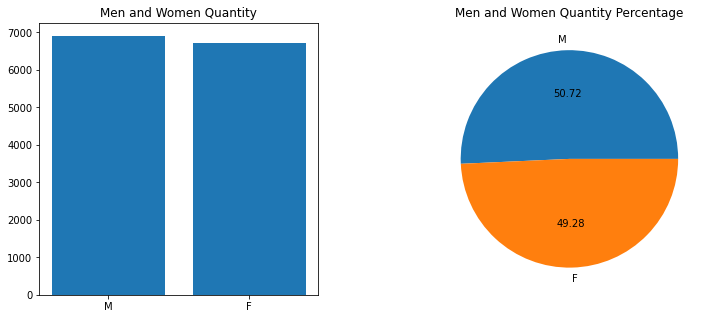

In [91]:
table = df.Customer_Gender.value_counts().reset_index()

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
# sns.barplot(data = table, x = "index", y = "Customer_Gender")
ax1.bar(x = table["index"], height = table.Customer_Gender)
plt.title("Men and Women Quantity")
# plt.show()

values = table.Customer_Gender
labels = table["index"]

ax2 = plt.subplot(1, 2, 2)
ax2.pie(x = values, labels = labels,autopct="%.2f")
plt.title("Men and Women Quantity Percentage")

plt.subplots_adjust(wspace= 0.4)
plt.show()


Qunatile:  0.25   27.0
Qunatile:  0.5   34.0
Qunatile:  0.75   43.0


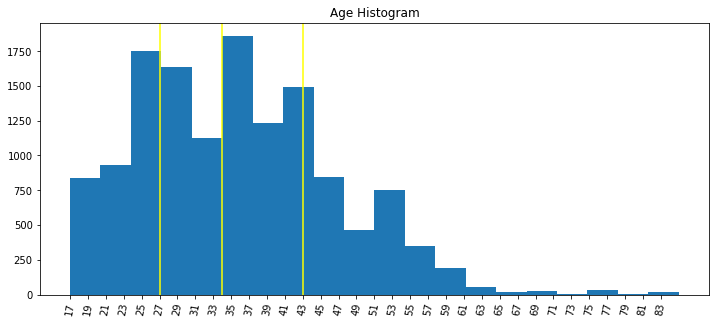

In [92]:
# Histograma grupos de edad
min_val = np.amin(df.Customer_Age)
max_val = np.amax(df.Customer_Age)

x_values = range(min_val, max_val, 2)
plt.figure(figsize = (12, 5))
ax = plt.subplot()
plt.hist(df.Customer_Age, bins = 20)
for i in range(25,100,25):
    plt.axvline(np.quantile(df.Customer_Age, i/100), c = "yellow")
    print("Qunatile: ", i/100, " ", np.quantile(df.Customer_Age, i/100))
ax.set_xticks(x_values)
plt.xticks(rotation = 80)
plt.title("Age Histogram")
plt.show()

# De 24 a 44 anos es mi mercado mas frecuente

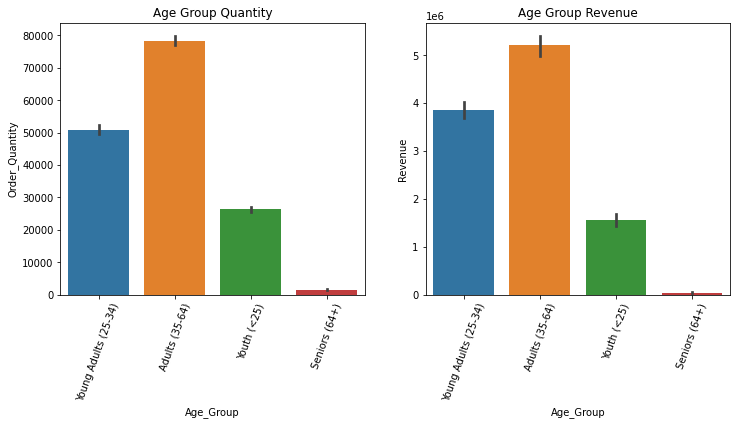

In [93]:
# Que group age genera mas ordenes
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
sns.barplot(ax = ax[0], data = df, x = "Age_Group", y = "Order_Quantity", estimator = np.sum)
ax[0].set_title("Age Group Quantity")
ax[0].tick_params(axis = "x", rotation = 70)

# Que grupo genera mas ganancias 
sns.barplot(ax = ax[1], data = df, x ="Age_Group", y = "Revenue", estimator = np.sum)
ax[1].set_title("Age Group Revenue")
ax[1].tick_params(axis = "x", rotation = 70)
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 864x360 with 0 Axes>

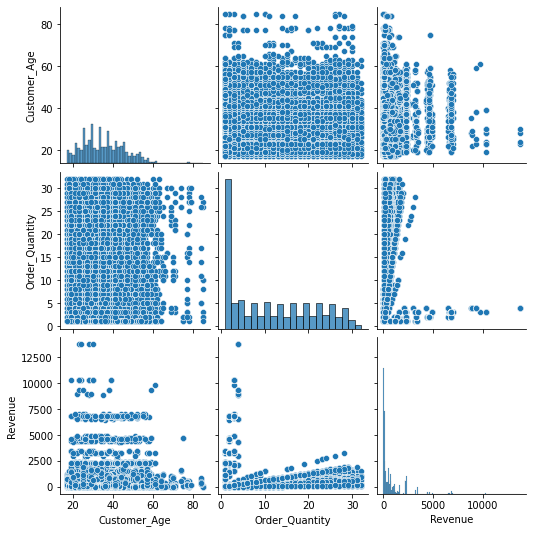

In [94]:
df_values = df[["Customer_Age", "Order_Quantity", "Revenue"]]
plt.clf()
plt.figure(figsize = (12, 5))
sns.pairplot(data = df_values)
plt.show()

<Figure size 432x288 with 0 Axes>

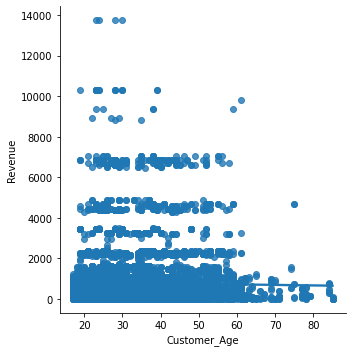

-0.021630021365059107


In [95]:
# Relacion entre edad e ingresos
plt.clf()
sns.lmplot(data = df, x = "Customer_Age", y = "Revenue")
plt.show()

corr,_ = pearsonr(df.Customer_Age, df.Revenue)
print(corr)

<Figure size 432x288 with 0 Axes>

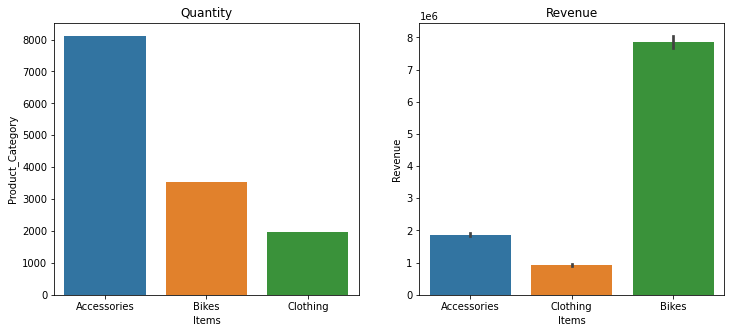

In [96]:
type_item = df.Product_Category.value_counts().reset_index()

plt.clf()
figure, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.barplot(ax = axes[0], data = type_item, x = "index", y = "Product_Category")
axes[0].set_title("Quantity")
axes[0].set_xlabel("Items")
sns.barplot(ax = axes[1], data = df, x =  "Product_Category", y = "Revenue", estimator = np.sum)
axes[1].set_title("Revenue")
axes[1].set_xlabel("Items")
plt.show()

<Figure size 432x288 with 0 Axes>

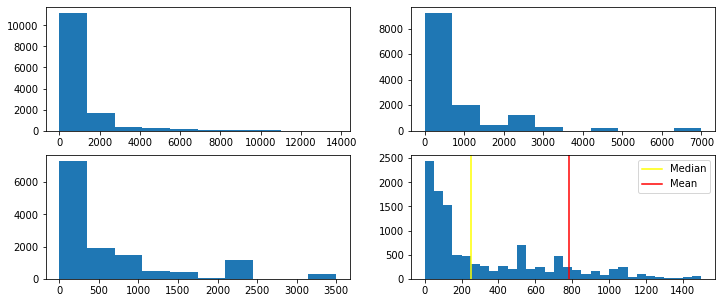

<Figure size 432x288 with 0 Axes>

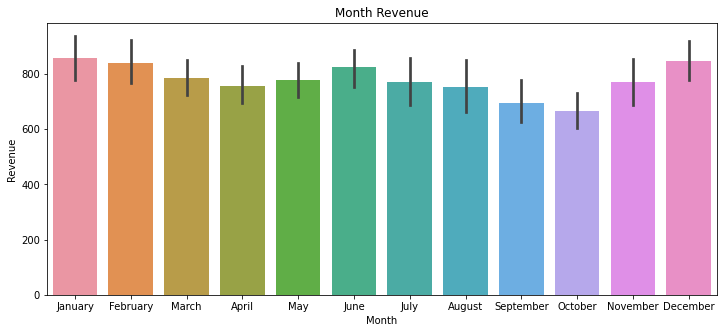

In [97]:
# Analizar Revenue 
ax4_x_values = range(0, 1400, 100)

plt.clf()
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(2, 2, 1)
ax1.hist(df.Revenue)

ax2 = plt.subplot(2, 2, 2)
ax2.hist(df.Revenue, range = (0, 7000))

ax3 = plt.subplot(2, 2, 3)
ax3.hist(df.Revenue, range = (0, 3500))

ax4 = plt.subplot(2, 2, 4)
ax4.hist(df.Revenue, range = (0, 1500), bins = 30)
ax4.axvline(np.quantile(df.Revenue, 0.5), color = "yellow", label = "Median")
ax4.axvline(np.mean(df.Revenue), color = "red", label = "Mean")
# ax4.set_xticklabels(ax4_x_values)

plt.legend()
plt.show()

# Analizar Revenue por mes
month_in_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.clf()
plt.figure(figsize = (12, 5))
sns.barplot(data = df, x = "Month", y = "Revenue", order = month_in_order)
plt.title("Month Revenue")
plt.show()

In [101]:
df_category_gender = pd.crosstab(df.Customer_Gender, df.Product_Category)
print(df_category_gender)
print(df_category_gender.columns)

df_category_gender["Gender"] = df_category_gender.index

df_category_gender = pd.melt(df_category_gender, value_vars = ["Accessories", "Bikes", "Clothing"], var_name="Item", id_vars = "Gender")

Product_Category  Accessories  Bikes  Clothing
Customer_Gender                               
F                        4036   1710       966
M                        4078   1814      1016
Index(['Accessories', 'Bikes', 'Clothing'], dtype='object', name='Product_Category')


<Figure size 432x288 with 0 Axes>

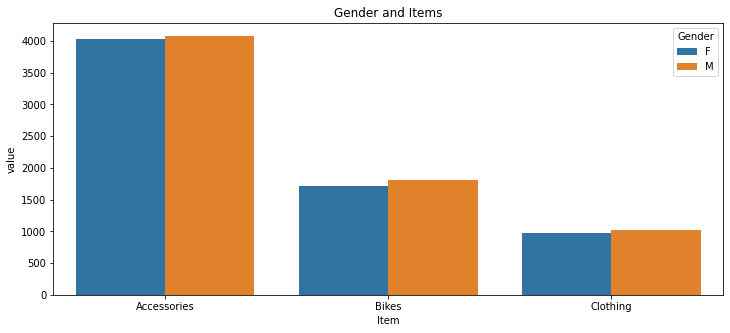

In [105]:
plt.clf()
plt.figure(figsize=(12, 5))
sns.barplot(data = df_category_gender, x = "Item", y = "value", hue = "Gender")
plt.title("Gender and Items")
plt.show()

In [124]:
# Quiero saber que grupo de edad compra que tipo de bicicleta
df_age_bikes = df[df.Product_Category == "Bikes"]
df_age_bikes_cross = pd.crosstab(df_age_bikes.Age_Group, df_age_bikes.Sub_Category)
print(df_age_bikes_cross)


chi2, p, dof, e = chi2_contingency(df_age_bikes_cross)
print("P-Value: ", p)
# Quiero saber si el valor observado al valor supuesto es muy diferente
# Si existe una gran diferencia entre el valor observado y el valor supuesto existe relacion entre las variables

# Melt df
df_age_bikes_cross["Age_Group"] = df_age_bikes_cross.index
melt_df_age_bikes = pd.melt(df_age_bikes_cross, id_vars = "Age_Group", value_vars = ["Mountain Bikes", "Road Bikes", "Touring Bikes"], var_name = "Items")


Sub_Category          Mountain Bikes  Road Bikes  Touring Bikes
Age_Group                                                      
Adults (35-64)                   584         704            316
Seniors (64+)                      2           2              0
Young Adults (25-34)             450         820            204
Youth (<25)                      146         218             78
P-Value:  2.9172405531877704e-08


<Figure size 432x288 with 0 Axes>

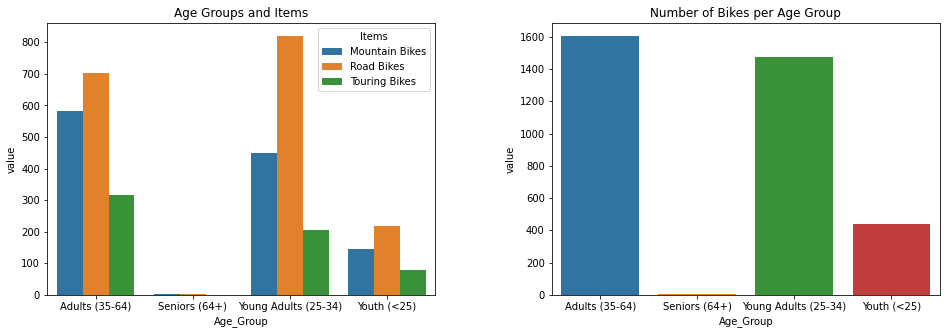

In [149]:
plt.clf()
f, axes = plt.subplots(1, 2, figsize = (16, 5))
# plt.figure(figsize = (12, 5))
sns.barplot(ax = axes[0], data = melt_df_age_bikes, x = "Age_Group", y = "value", hue = "Items")
axes[0].set_title("Age Groups and Items")

# print(melt_df_age_bikes)
# print(melt_df_age_bikes.groupby("Age_Group").value.sum().reset_index())

age_group = melt_df_age_bikes.groupby("Age_Group").value.sum().reset_index()
sns.barplot(ax = axes[1], data = age_group, x = "Age_Group", y ="value")
axes[1].set_title("Number of Bikes per Age Group")

plt.subplots_adjust(wspace= 0.3)
plt.show()

<Figure size 432x288 with 0 Axes>

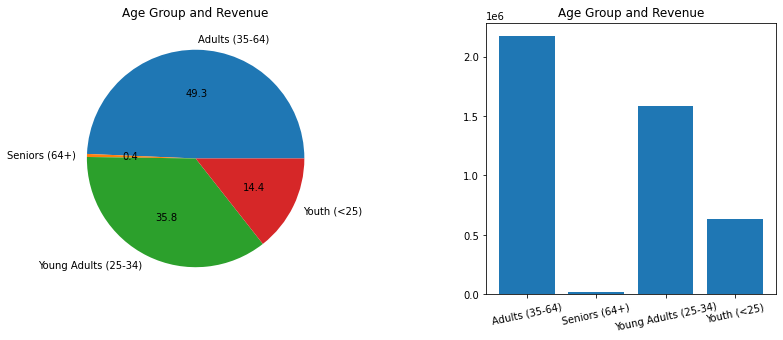

In [182]:
# Que grupo de edad me genera mas profit
age_group_profit = df.groupby("Age_Group").Profit.sum().reset_index()

age_group_profit

plt.clf()
plt.figure(figsize = (13, 5))
plt.title("Age Group and Revenue")

ax1 = plt.subplot(1, 2, 1)
ax1.pie(x = age_group_profit.Profit, labels = age_group_profit.Age_Group, autopct= "%.1f")
ax1.set_title("Age Group and Revenue")

ax2 = plt.subplot(1, 2, 2)
ax2.bar(x = age_group_profit.Age_Group, height = age_group_profit.Profit)
ax2.set_title("Age Group and Revenue")
plt.xticks(rotation = 12)


plt.subplots_adjust(wspace= 0.5)
plt.show()

In [189]:
# Items con mayor utilidad
df_profit = df

def percentage(x):
    per = (x.Profit * 100) / x.Revenue
    return round(per)

df_profit["Profit_Percentage"] = df_profit.apply(percentage, axis = 1)

C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_3232/152599583.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_profit["Profit_Percentage"] = df_profit.apply(percentage, axis = 1)


  Product_Category  Profit_Percentage
0      Accessories          59.800468
1            Bikes          37.448922
2         Clothing          31.805247


<Figure size 432x288 with 0 Axes>

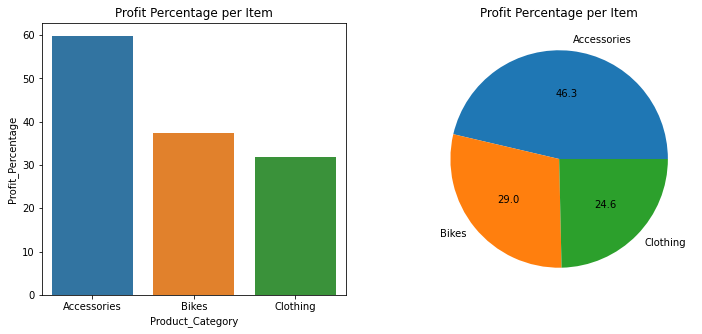

In [208]:
df_profit_percentage = df_profit.groupby("Product_Category").Profit_Percentage.mean().reset_index()
print(df_profit_percentage)

plt.clf()
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
sns.barplot(ax = axes[0], data = df_profit_percentage, x = "Product_Category", y = "Profit_Percentage")
axes[0].set_title("Profit Percentage per Item")

plt.pie(x = df_profit_percentage.Profit_Percentage, labels = df_profit_percentage.Product_Category, autopct = "%.1f")
plt.title("Profit Percentage per Item")

plt.show()

In [198]:
df
# Segmentacion de clientes -> Clientes que compran muchas cosas y gastan mucho clinetes que compran poco y gastan mucho  

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Percentage
58,2013-09-17,17,September,2013,29,Young Adults (25-34),F,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1053,675,1728,61
59,2015-09-17,17,September,2015,29,Young Adults (25-34),F,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,15,45,120,1053,675,1728,61
116,2013-09-13,13,September,2013,53,Adults (35-64),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,281,180,461,61
117,2015-09-13,13,September,2015,53,Adults (35-64),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,140,90,230,61
204,2014-05-11,11,May,2014,17,Youth (<25),M,United Kingdom,England,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,421,270,691,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113005,2016-05-03,3,May,2016,21,Youth (<25),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,61
113028,2013-12-28,28,December,2013,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123,61
113029,2015-12-28,28,December,2015,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",2,24,64,75,48,123,61
113030,2014-04-12,12,April,2014,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",6,24,64,225,144,369,61


<Figure size 432x288 with 0 Axes>

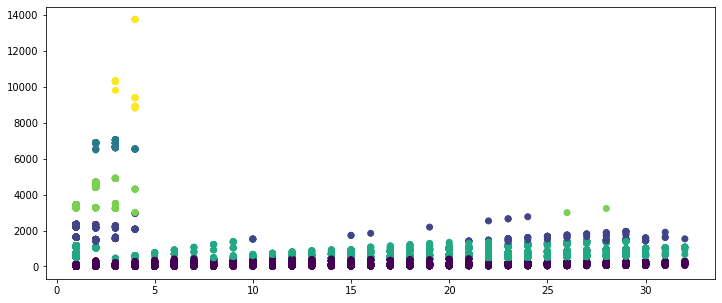

In [236]:
df_kmeans = df[["Order_Quantity", "Revenue"]]
kmeans = KMeans(n_clusters = 6, init = "k-means++").fit(df_kmeans)
cla = kmeans.predict(df_kmeans)

plt.clf()
plt.figure(figsize = (12, 5))
plt.scatter(df.Order_Quantity, df.Revenue, c = cla)
plt.show()

In [238]:
df[(df.Revenue > 8000) & (df.Order_Quantity < 5)]
# Tipo de clientes:
# ->Fuerte > 8000
# ->Medio > 6000 < 8000
# ->Bajo > 3000 < 6000
# ->Basico < 3000

def categoria_cliente(x):
    if x.Revenue <= 3000:
        return "Basico"
    elif x.Revenue > 3000 and x.Revenue <= 6000:
        return "Bajo"
    elif x.Revenue > 6000 and x.Revenue < 8000:
        return "Medio"
    elif x.Revenue > 8000:
        return "Fuerte"

df["Client_Segment"] = df.apply(categoria_cliente, axis = 1)

C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_3232/389182615.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Client_Segment"] = df.apply(categoria_cliente, axis = 1)


<Figure size 432x288 with 0 Axes>

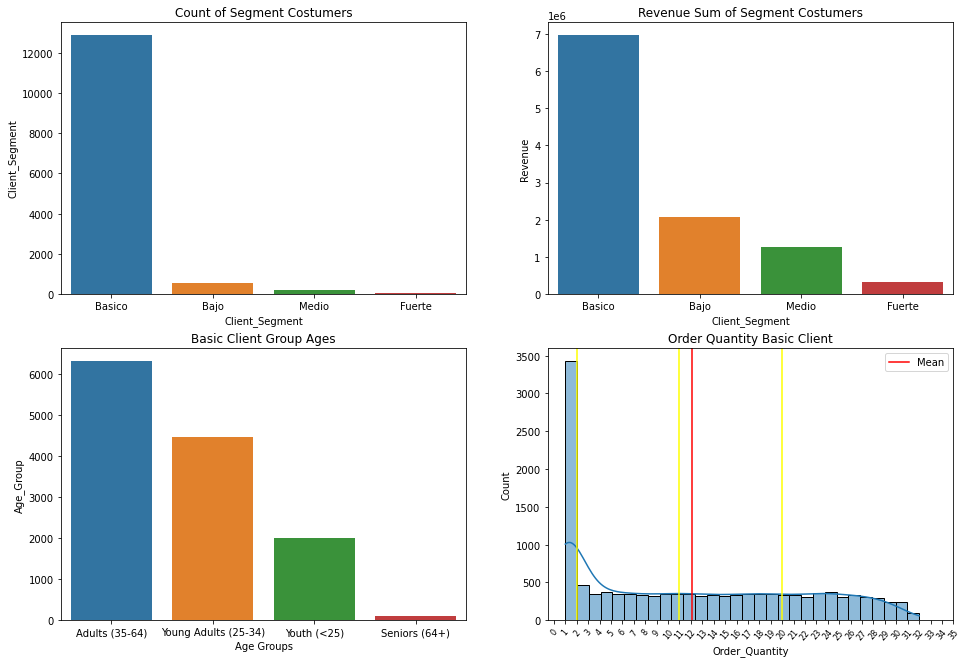

9.58633305839429
11.0
ModeResult(mode=array([1], dtype=int64), count=array([2853]))


In [325]:
# Visualizar la cantidad de tipos de cliente por segemnto 
client_segment_valuec = df.Client_Segment.value_counts().reset_index()
# print(client_segment_valuec)

# Visualizar la cantidad de dinero generado por segmento 
client_segment_revenuec = df.groupby("Client_Segment").Revenue.sum().reset_index()
# print(client_segment_revenuec)

# Checar el grupo de edad del segmento mas generador
df_client_basico = df[df.Client_Segment == "Basico"]
client_basico_age = df_client_basico.Age_Group.value_counts().reset_index()
# print(client_basico_age)

# Promedio de articulos generado por cliente basico "Cuantos productos promedio compra el cliente basico"
x_values = range(0, 36, 1)

plt.clf()
fig, axes = plt.subplots(2, 2, figsize = (16, 11))

sns.barplot(ax = axes[0][0], data = client_segment_valuec, x = "index", y = "Client_Segment")
axes[0][0].set_xlabel("Client_Segment")
axes[0][0].set_title("Count of Segment Costumers")

sns.barplot(ax = axes[0][1], data = client_segment_revenuec, x = "Client_Segment", y = "Revenue", estimator = sum, order = ["Basico", "Bajo", "Medio", "Fuerte"])
axes[0][1].set_title("Revenue Sum of Segment Costumers")

sns.barplot(ax = axes[1][0], data = client_basico_age, x = "index", y = "Age_Group")
axes[1][0].set_title("Basic Client Group Ages")
axes[1][0].set_xlabel("Age Groups")

sns.histplot(ax = axes[1][1], data = df_client_basico, x = "Order_Quantity", kde = True, bins = 30)
axes[1][1].set_title("Order Quantity Basic Client")
axes[1][1].set_xticks(x_values)
for i in range(25, 100, 25):
    axes[1][1].axvline(np.quantile(df_client_basico.Order_Quantity, i/100), color = "yellow")
axes[1][1].axvline(np.mean(df_client_basico.Order_Quantity), color = "red", label = "Mean")
plt.xticks(rotation = 50, fontsize = 8)

plt.legend()
plt.show()

print(np.std(df_client_basico.Order_Quantity))
print(np.median(df_client_basico.Order_Quantity))
print(mode(df_client_basico.Order_Quantity, axis = None))

# Fuerte del negocio no es el mayoreo si no mis dos primeros quartiles

<Figure size 432x288 with 0 Axes>

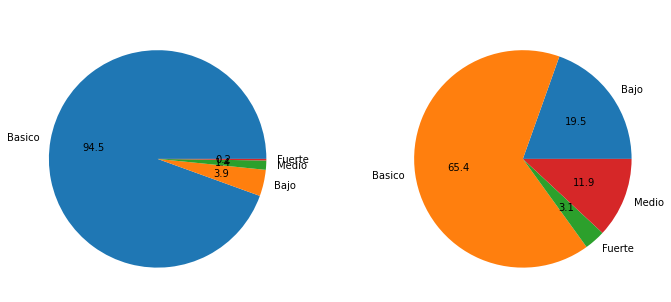

In [375]:
plt.clf()
plt.figure(figsize = (12, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.pie(labels = client_segment_valuec["index"], x = client_segment_valuec.Client_Segment, autopct="%.1f")
ax1.set_title("Client Segment Proportion", color = "white")

ax2 = plt.subplot(1, 2, 2)
ax2.pie(labels = client_segment_revenuec.Client_Segment, x = client_segment_revenuec.Revenue, autopct = "%.1f")
ax2.set_title("Client Segment Revenue Proportion", color = "white")


plt.show()

# print(client_segment_valuec)
# print(client_segment_revenuec)


In [343]:
df_basico = df_client_basico

<Figure size 432x288 with 0 Axes>

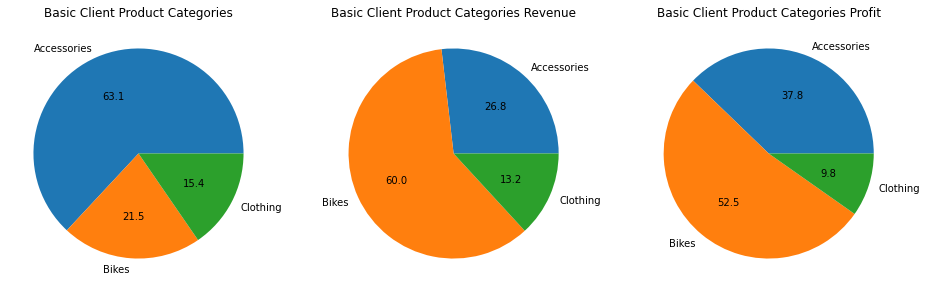

In [494]:
plt.clf()
plt.figure(figsize = (16, 5), facecolor = "white")

ax1 = plt.subplot(1, 3, 1)
ax1.pie(x = df_basico.Product_Category.value_counts().reset_index()["Product_Category"], labels = df_basico.Product_Category.value_counts().reset_index()["index"], autopct="%.1f")
ax1.set_title("Basic Client Product Categories")


df_basico_revenue = df_basico.groupby("Product_Category").Revenue.sum().reset_index()

ax2 = plt.subplot(1, 3, 2)
ax2.pie(x = df_basico_revenue.Revenue, labels = df_basico_revenue.Product_Category, autopct= "%.1f")
ax2.set_title("Basic Client Product Categories Revenue")

df_basico_profit = df_basico.groupby("Product_Category").Profit.sum().reset_index()

ax3 = plt.subplot(1, 3, 3)
ax3.pie(x = df_basico_profit.Profit, labels = df_basico_profit.Product_Category, autopct = "%.1f")
ax3.set_title("Basic Client Product Categories Profit")


plt.show()

# Mi Basic Client consume mas accesorios lo cual genera un 26.8 de los ingresos totales
# Mi Basic Client consume un 21.5% de bicicletas las cuales me generan el 60% de mis ingresos
# Las Bicicletas me generan el 52% de las ganancias en mi clientela basica

<Figure size 432x288 with 0 Axes>

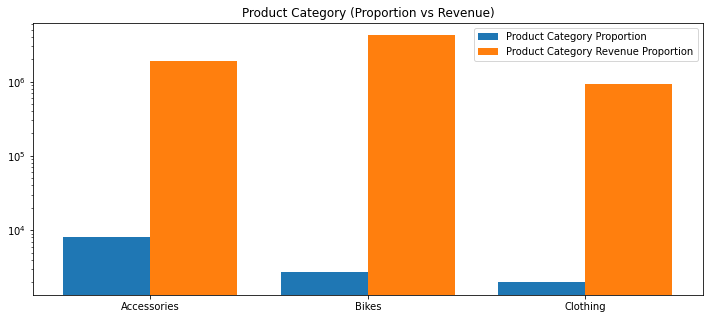

In [496]:
# tabla de comparacion entre porcentaje de categorias y porcentaje de ganancias
x1_values = [2 * index + (1 * 0.8) for index in range(3)]
x2_values = [2 * index + (2 * 0.8) for index in range(3)]
x_values = [a + (b - a) / 2 for a, b in zip(x1_values, x2_values)]
x_labels = ["Accessories", "Bikes", "Clothing"]

plt.clf()
plt.figure(figsize=(12, 5))
plt.title("Product Category (Proportion vs Revenue)")
ax = plt.subplot()
plt.bar(x1_values, df_basico.Product_Category.value_counts().reset_index()["Product_Category"], log = True, label = "Product Category Proportion")
plt.bar(x2_values, df_basico_revenue.Revenue, log = True, label = "Product Category Revenue Proportion")
ax.set_xticks(x_values)
ax.set_xticklabels(x_labels)

plt.legend()
plt.show()

# Bicicletas es el item que mas aporta a las ganacias de la empresa, siendo el segundo item mas comprado
# Meter mas marketing enfocado en las bicicletas al segmento de cliente basico y bajo los cuales son el 80% de las ganancias

In [423]:
# Dentro del segmento basico entran tres grupos los cuales van de (0-10), (11-20), (21-30) 

df_basico_bajo =  df_basico[df_basico.Order_Quantity <= 10]  #Rango de 0 - 10
df_basico_medio = df_basico[df_basico.Order_Quantity.isin(range(11,21,1))] #Rango de 11 - 20
df_basico_alto = df_basico[df_basico.Order_Quantity > 20] #Rango de 20 - 30

[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


<Figure size 432x288 with 0 Axes>

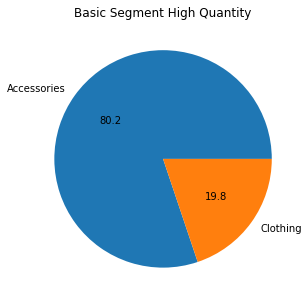

In [448]:
# Analizar porque este cliente bajo compra tantas cosas sin elevar los costos
df_temp = df_basico_alto.Product_Category.value_counts().reset_index()
# Ninguno compra bicicletas si no accesorios y ropa
plt.clf()
plt.figure(figsize=(12,5), facecolor="white")
plt.title("Basic Segment High Quantity", color = "black")
plt.pie(x = df_temp.Product_Category, labels = df_temp["index"], autopct= "%.1f")
plt.show()
# Quiero saber que accesorios compran, son distribuidores de segunda mano ?
# No compran nada de bicicletas


<Figure size 432x288 with 0 Axes>

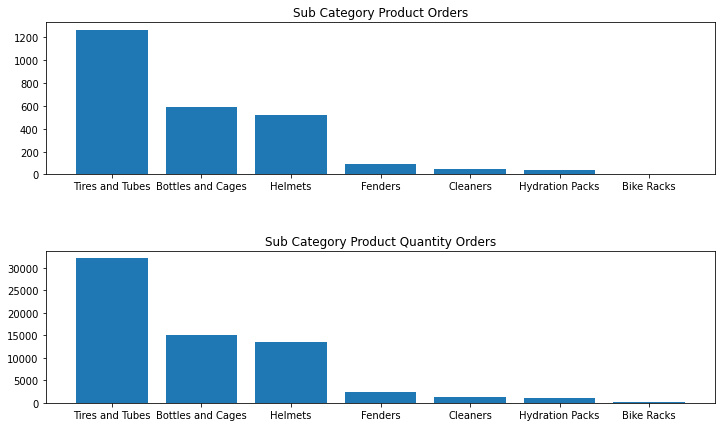

In [471]:
df_temp = df_basico_alto[df_basico_alto.Product_Category == "Accessories"]["Sub_Category"].value_counts().reset_index()
df_temp2 = df_basico_alto[df_basico_alto.Product_Category == "Accessories"][["Sub_Category", "Order_Quantity"]].reset_index()
df_temp2 = df_temp2.groupby("Sub_Category").Order_Quantity.sum().reset_index()
df_temp2 = df_temp2.sort_values(by = "Order_Quantity", ascending=False)
# Ya se que es lo que mas piden los clientes

plt.clf()
plt.figure(figsize = (12, 7))

ax1 = plt.subplot(2, 1, 1)
ax1.bar(x=df_temp["index"], height= df_temp.Sub_Category)
ax1.set_title("Sub Category Product Orders")

ax2 = plt.subplot(2, 1, 2)
ax2.bar(x = df_temp2.Sub_Category, height= df_temp2.Order_Quantity)
ax2.set_title("Sub Category Product Quantity Orders")

plt.subplots_adjust(hspace=0.5)
plt.show()

# Quiero ver que accesorio que en cantidad piden mas
# Piden mas Tires adn Tubes que otra cosa por lo que creo que son provedores

<Figure size 432x288 with 0 Axes>

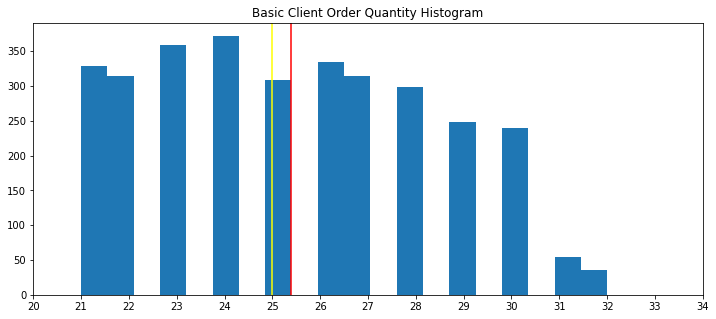

In [497]:
# Revisar promedio de pedido de cliente df_basico_alto
x_values = range(20, 35, 1)
plt.clf()
plt.figure(figsize = (12, 5))
ax = plt.subplot()
plt.hist(df_basico_alto.Order_Quantity, bins = 20)
plt.axvline(np.quantile(df_basico_alto.Order_Quantity, 0.5), color = "yellow")
plt.axvline(np.mean(df_basico_alto.Order_Quantity), color = "red")
ax.set_xticks(x_values)
ax.set_title("Basic Client Order Quantity Histogram")
plt.show()

# El promedio de mi cliente basico alto compra 35 piezas por orden 
# Este es mi cliente posible sub proveedor a los cuales les puedo dar mejor precio a volumen

{'Mountain-200': 623, 'Mountain-400-W': 224, 'Mountain-500': 118}
{'Road-750': 502, 'Road-350-W': 215, 'Road-550-W': 250, 'Road-250': 152, 'Road-650': 164}
{'Touring-1000': 301, 'Touring-3000': 150, 'Touring-2000': 73}


<Figure size 432x288 with 0 Axes>

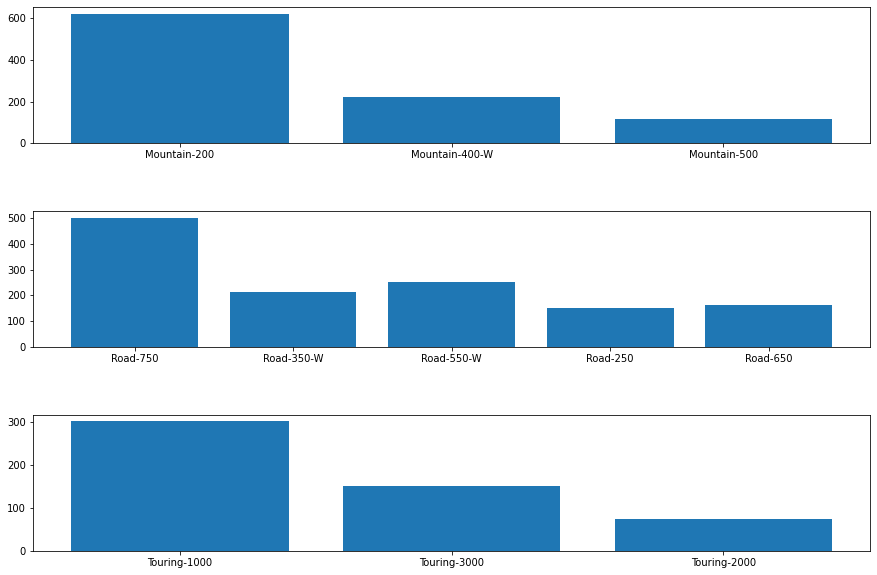

In [569]:
# Analizar compras de bicicletas de la clientela basica dado que piden promedio 25 piezas en bicicletas sin subir de 3000 dolares
# Analizar las bicicletas dado que son lo que mas ganancias e ingresos generan

df_basico_bicicleta = df_basico[df_basico.Product_Category == "Bikes"]
df_sub_category_count = df_basico_bicicleta.Sub_Category.value_counts().reset_index()
# Mi cliente basico compra mas bicicletas tipo Road Bike

# Crear diccionario para suamr valores 
new_df = {}

# Funcion para iterar df dentro de funcion incrustar_modelos
def iteracion_df(x):
    if x.Product_Name in new_df.keys():
        new_df[x.Product_Name] += x.Quantity
    else:
        new_df[x.Product_Name] = x.Quantity

# Funcion para juntar modelos de bicicletas
def incrustar_modelos(df):
    df = df.reset_index()
    df.columns = ["Product_Name", "Quantity"]
    product_names = df["Product_Name"].str.split()

    # Lista nueva 
    new_product_names = []

    # Iteracion para remover color y talla de bicicleta
    for name in product_names:
        new_product_names.append(name[0])

    # Agregar nuevos nombres a df
    df["Product_Name"] = new_product_names

    # Iterar df con funcion apply
    df.apply(iteracion_df, axis = 1)

    # Nuevo diccionario
    print(new_df)


plt.clf()
plt.figure(figsize = (15, 10))

ax1 = plt.subplot(1, 1, 1)
ax1.bar(x = df_sub_category_count["index"], height = df_sub_category_count.Sub_Category)

df_sub_category = list(df_basico_bicicleta.groupby("Sub_Category"))

for i in range(len(df_sub_category)):
    name = df_sub_category[i][0]
    df = df_sub_category[i][1]
    x_values = df.Product.value_counts()
    incrustar_modelos(x_values)

    ax2 = plt.subplot(3, 1, i + 1)
    ax2.bar(x = list(new_df.keys()), height = list(new_df.values()))

    new_df.clear()

plt.subplots_adjust(hspace=0.5)
plt.show()

# Quiero ver una de que bicicletas venden mas 
# Quiero ver una de que tipo de bicicletas en cada categoria y las veces comprada
# Quiero ver el costo de cada bicicleta en su categoria 

In [510]:
df_basico_bicicleta

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Percentage,Client_Segment
50439,2011-08-13,13,August,2011,39,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1,1252,2295,951,1252,2203,43,Basico
50440,2013-05-05,5,May,2013,39,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1,1252,2295,951,1252,2203,43,Basico
50441,2015-05-05,5,May,2015,39,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1,1252,2295,951,1252,2203,43,Basico
50442,2013-06-19,19,June,2013,39,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1,1252,2295,951,1252,2203,43,Basico
50443,2015-06-19,19,June,2015,39,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1,1252,2295,951,1252,2203,43,Basico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112049,2016-05-04,4,May,2016,22,Youth (<25),M,United Kingdom,England,Bikes,Touring Bikes,"Touring-2000 Blue, 46",1,755,1215,411,755,1166,35,Basico
112064,2013-12-05,5,December,2013,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289,35,Basico
112066,2014-01-18,18,January,2014,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289,35,Basico
112068,2014-02-27,27,February,2014,37,Adults (35-64),F,United Kingdom,England,Bikes,Touring Bikes,"Touring-1000 Blue, 54",1,1482,2384,807,1482,2289,35,Basico
